In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Set the path to the dataset
data_path = '../data/gym_members_exercise_tracking.csv'

# Load the dataset
try:
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")

# Display the first few rows
df.head()


C:\Users\anike\project_fitness_analysis\notebooks
Dataset loaded successfully.


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [14]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

# Convert columns to appropriate data types (if needed)
df['Age'] = df['Age'].astype(int)
df['Workout_Frequency (days/week)'] = df['Workout_Frequency (days/week)'].astype(int)

# Display basic information about the dataset
df.info()




Missing values in each column:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int32  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)           

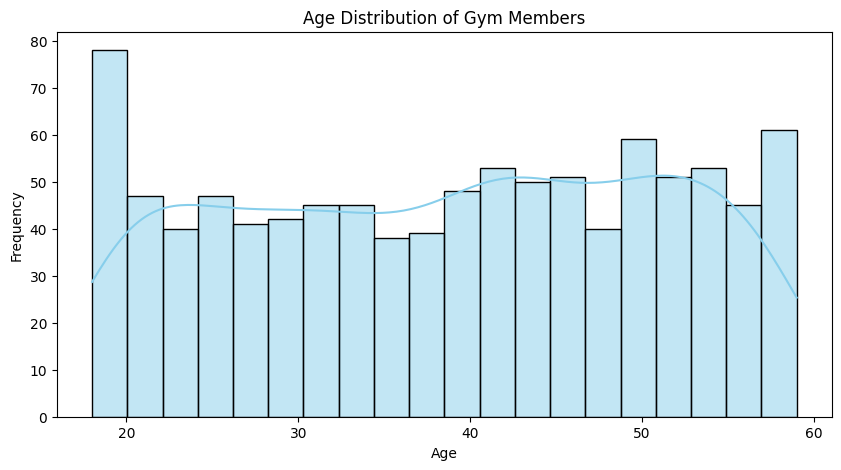

In [23]:
# Summary statistics
df.describe()

# Visualizing the distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Gym Members')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



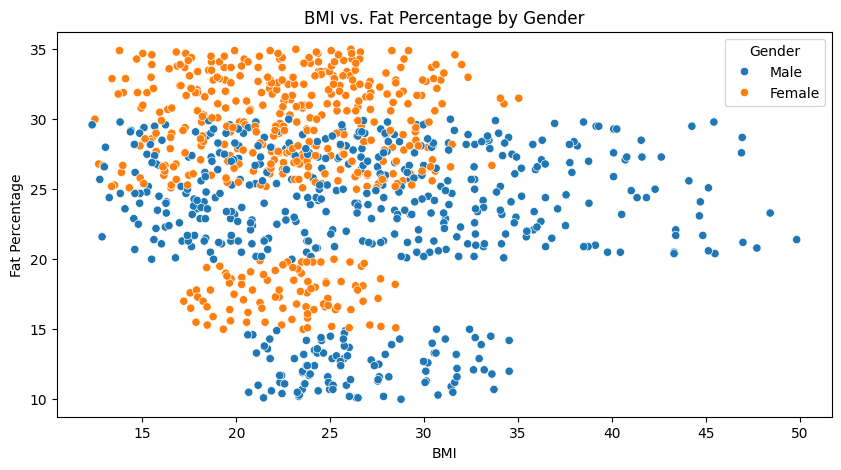

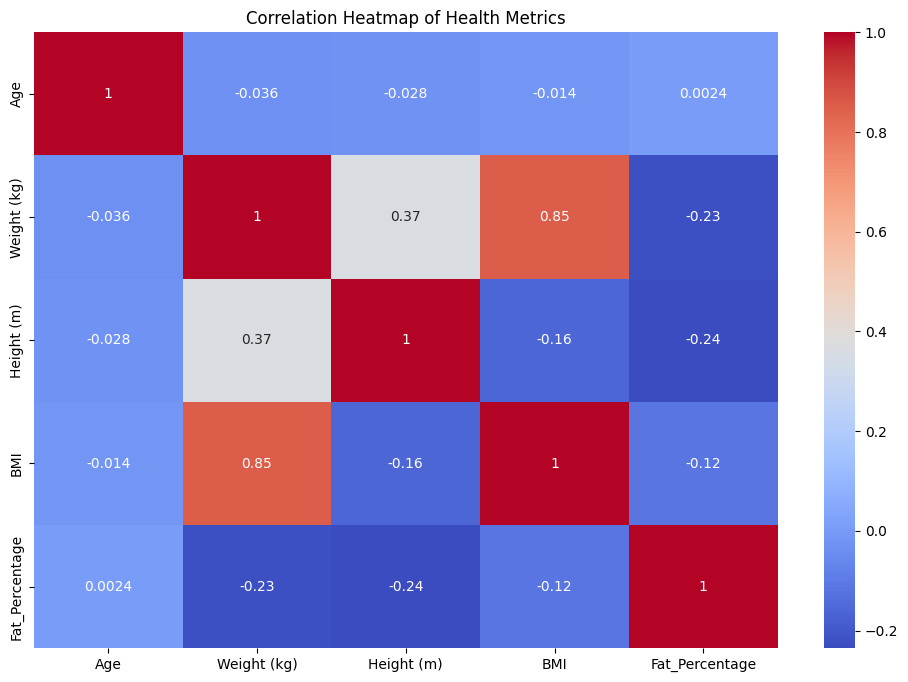

In [22]:
# Scatter plot: BMI vs. Fat Percentage
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='BMI', y='Fat_Percentage', hue='Gender')
plt.title('BMI vs. Fat Percentage by Gender')
plt.xlabel('BMI')
plt.ylabel('Fat Percentage')
plt.show()

# Correlation heatmap for health-related metrics
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Health Metrics')
plt.show()



C:\Users\anike\AppData\Local\Temp\ipykernel_20532\2291093340.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_calories.index, y=avg_calories.values, palette='viridis')


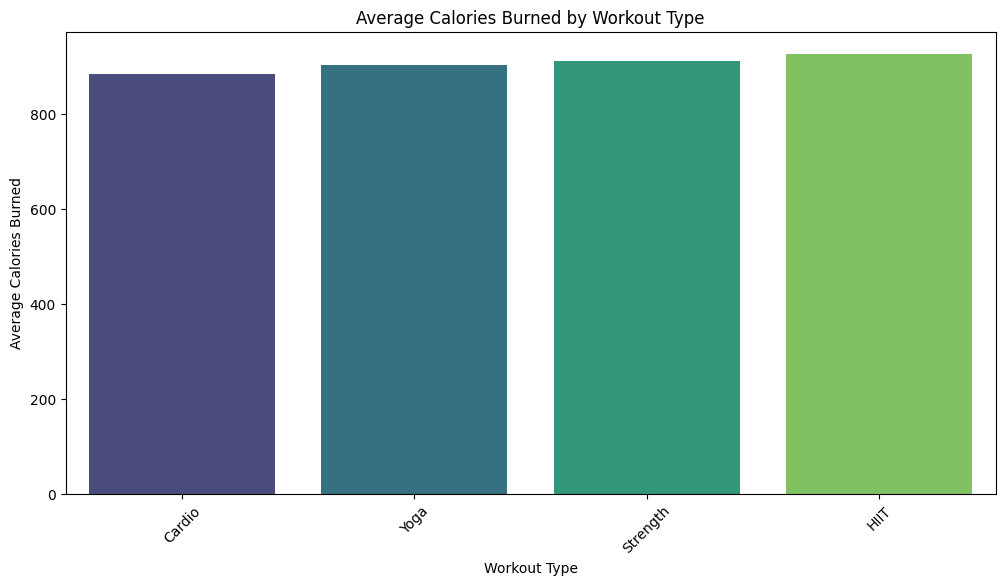

C:\Users\anike\AppData\Local\Temp\ipykernel_20532\2291093340.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Session_Duration (hours)', palette='muted')


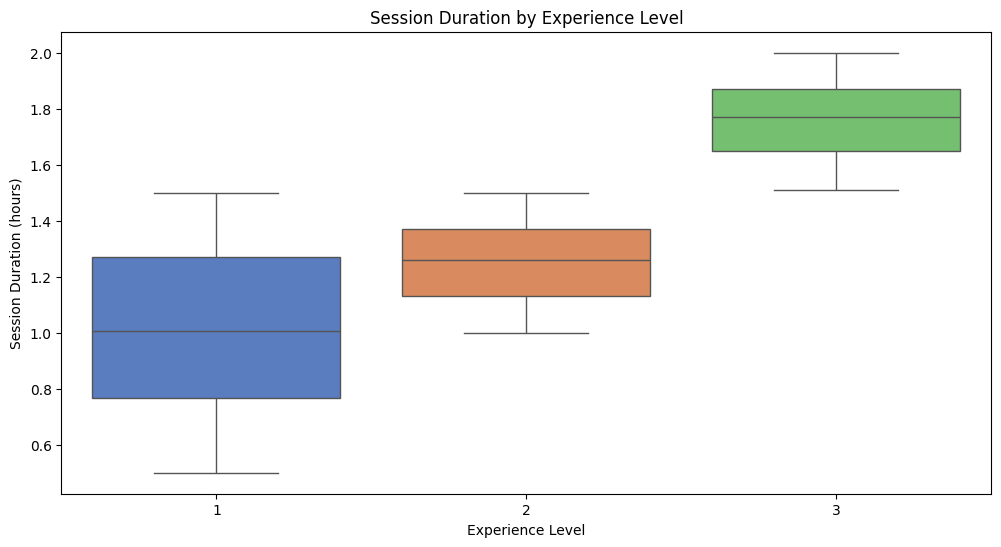

In [17]:
# Average calories burned by workout type
avg_calories = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_calories.index, y=avg_calories.values, palette='viridis')
plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)
plt.show()

# Boxplot: Session duration by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Session_Duration (hours)', palette='muted')
plt.title('Session Duration by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Session Duration (hours)')
plt.show()


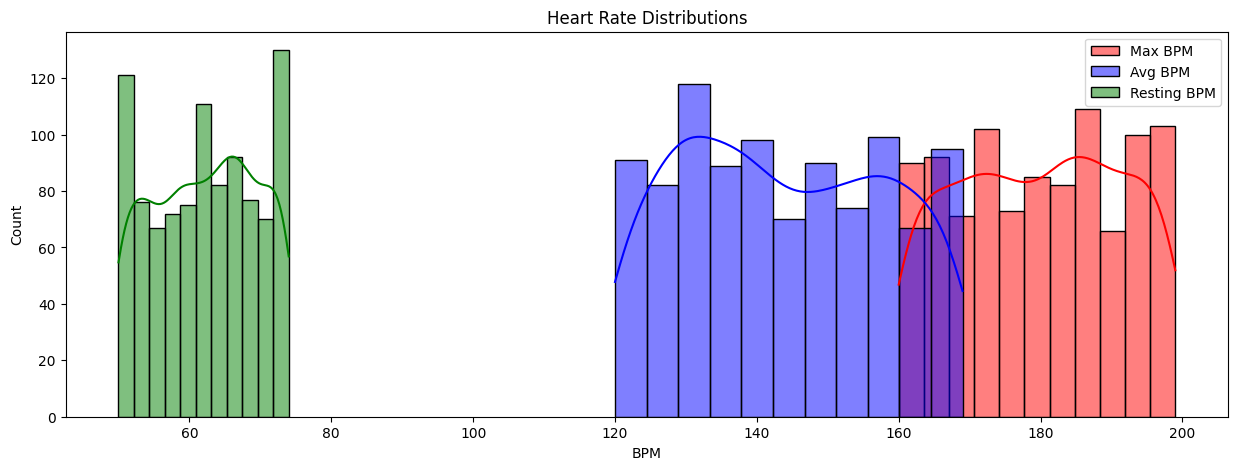

C:\Users\anike\AppData\Local\Temp\ipykernel_20532\3662499191.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Resting_BPM', palette='cool')


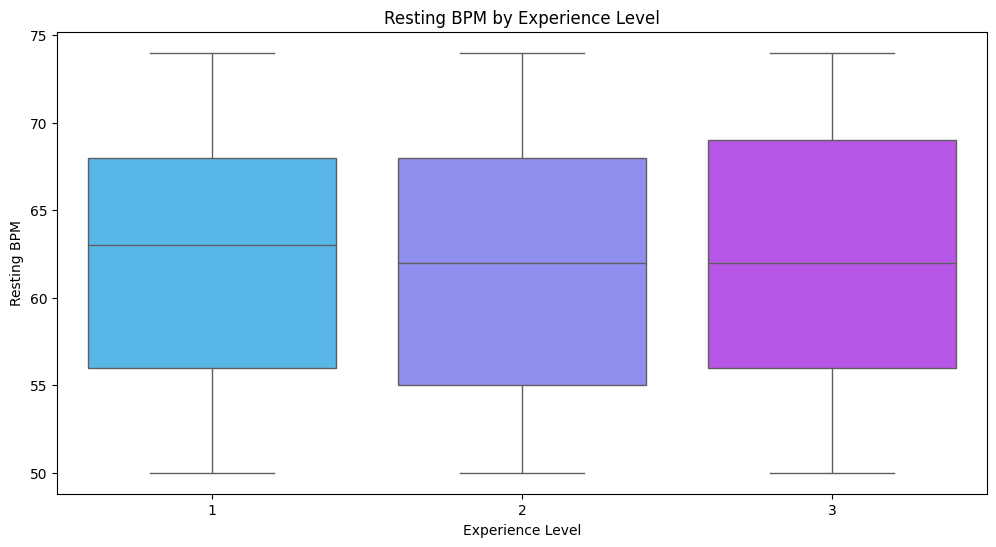

In [18]:
# Distribution of Max BPM, Avg BPM, and Resting BPM
plt.figure(figsize=(15, 5))
sns.histplot(df['Max_BPM'], color='red', label='Max BPM', kde=True, alpha=0.5)
sns.histplot(df['Avg_BPM'], color='blue', label='Avg BPM', kde=True, alpha=0.5)
sns.histplot(df['Resting_BPM'], color='green', label='Resting BPM', kde=True, alpha=0.5)
plt.title('Heart Rate Distributions')
plt.xlabel('BPM')
plt.legend()
plt.show()

# Comparing Resting BPM across Experience Levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Experience_Level', y='Resting_BPM', palette='cool')
plt.title('Resting BPM by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Resting BPM')
plt.show()


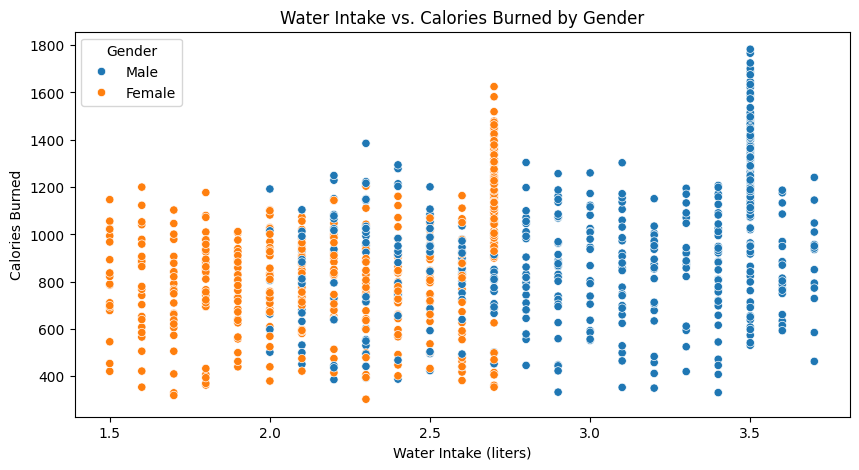

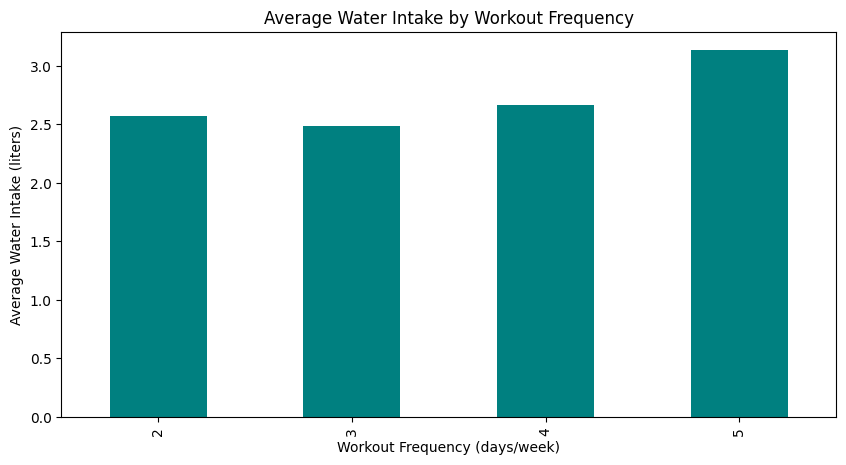

In [19]:
# Water Intake vs. Calories Burned
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Water_Intake (liters)', y='Calories_Burned', hue='Gender')
plt.title('Water Intake vs. Calories Burned by Gender')
plt.xlabel('Water Intake (liters)')
plt.ylabel('Calories Burned')
plt.show()

# Average water intake by workout frequency
avg_water_intake = df.groupby('Workout_Frequency (days/week)')['Water_Intake (liters)'].mean()

plt.figure(figsize=(10, 5))
avg_water_intake.plot(kind='bar', color='teal')
plt.title('Average Water Intake by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Average Water Intake (liters)')
plt.show()
